In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# using RandomForestRegressor to average oxidation state

# x_train = np.load('../../jian_use/V_Cu_x_train.npy')
# y_train = np.load('../../jian_use/V_Cu_y_train.npy')
# x_test = np.load('../../jian_use/V_Cu_x_test.npy')
# y_test = np.load('../../jian_use/V_Cu_y_test.npy')

x_train = np.load('../../jian_use/x_train_0.3.npy')
y_train = np.load('../../jian_use/y_train_0.3.npy')
x_test = np.load('../../jian_use/x_test_0.3.npy')
y_test = np.load('../../jian_use/y_test_0.3.npy')


# x_train = np.concatenate((x_train, x_train_1), axis=0)
# y_train = np.concatenate((y_train, y_train_1), axis=0)
# x_test = np.concatenate((x_test, x_test_1), axis=0)
# y_test = np.concatenate((y_test, y_test_1), axis=0)


y_train = np.dot(y_train, np.arange(8))
y_test = np.dot(y_test, np.arange(8))


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4678, 1734), (4678,), (1170, 1734), (1170,))

Mean Squared Error: 0.27
R2 Score: 0.80
Accuracy: 0.80


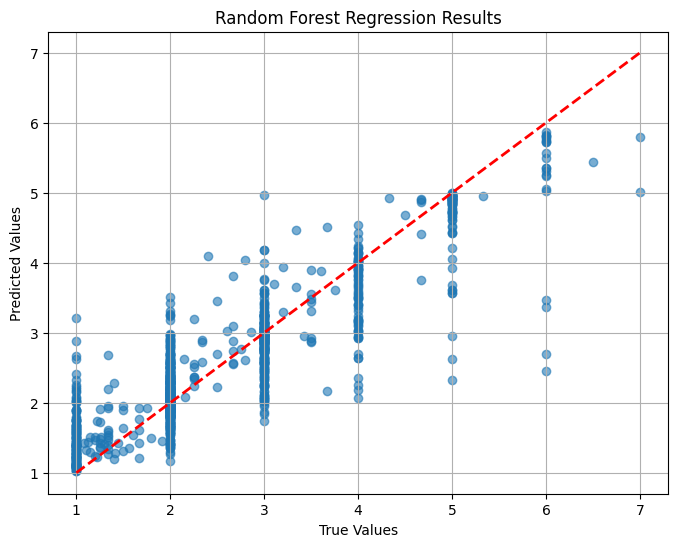

In [24]:
num_trees = 500  
max_features = "sqrt"  
random_state = 42  


rf_model = RandomForestRegressor(
    n_estimators=num_trees,
    max_features=max_features,
    random_state=random_state,
    n_jobs=-1,  
)


rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)

print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("R2 Score: {:.2f}".format(r2_score(y_test, y_pred)))
print('Accuracy: {:.2f}'.format(rf_model.score(x_test, y_test)))


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression Results")
plt.grid()
plt.show()


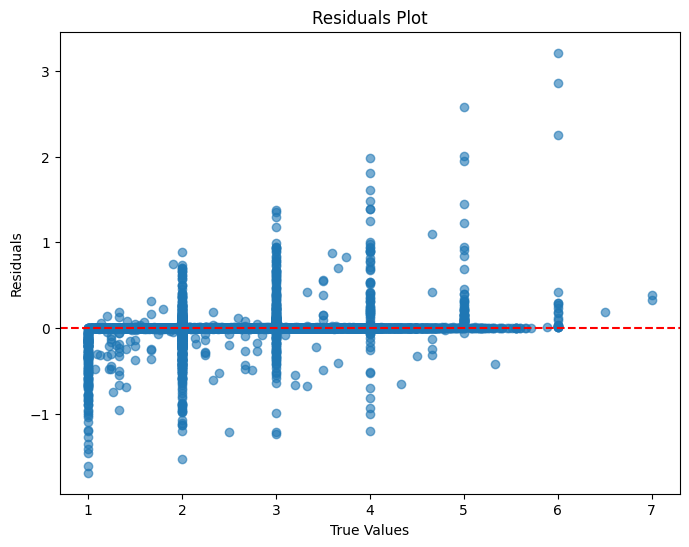

In [9]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring="r2")
print("Cross-validated R² scores:", scores)
print("Mean R²:", np.mean(scores))

Cross-validated R² scores: [0.73340902 0.99998884 0.99998693 0.99999015 0.9999918 ]
Mean R²: 0.9466733470045872
